# Load Data

In [1]:
import numpy as np
from scipy.optimize import curve_fit
from scipy.optimize import least_squares
import DC_Pickle as dcp
import Curve_Functions as cv
import matplotlib.pyplot as plt
%matplotlib inline

def disp_Data(x, y_true, y_pred, file_path, clt_num, cost, rows=1, columns=1, size=(6, 4)):
    fig, ax = plt.subplots(rows, columns, figsize=size)
    ax.plot(x, y_true, 'rx', label='average score')
    ax.plot(x, y_pred, 'b-', label='curve fitting')
    ax.set_xlim([0, max(x)+1])
    ax.set_ylim([0, max(y_true)+0.2])
    ax.legend(fontsize=14)
    ax.set_title("cluster {0}: cost {1}".format(clt_num, round(cost, 2)))
    fig.savefig(file_path, dpi=100)
    plt.show()
    
train_idx = dcp.open_Pickle("../../data/pickles/clusters_origin/indices/index13.pickle")
train_idx = train_idx[9] #2, 8

train_scores = dcp.open_Pickle('../../data/pickles/seperate_origin/eventValue.pickle')
train_scores = train_scores[:300, :]/1e+4
attempts15 = np.arange(15)+1
attempts300 = np.arange(300)+1

## filtering discontinuous under 15 attempts
idx_all = []
idx_pure = []

for i in range(train_scores.shape[1]):
    if not np.isnan(train_scores[:15, i]).any():
        idx_all.append(i)
        idx_pure.append(i)
    else:
        idx_all.append(np.nan)

train_scores = train_scores[:, idx_pure]
print("Training data set: {0}".format(np.shape(train_scores)))

## get cluster data and cluster average data (average is centroid)
nClt = 13
for i in range(nClt):
    name = "cluster{0}".format(i+1)
    globals()[name] = train_scores[:, train_idx==i] # get cluster data
    
    ## get cluster average data
    data = np.ones(300)
    for j in range(len(data)):
        avg = eval(name)[j, :]
        avg = np.sum(avg[~np.isnan(avg)])/len(avg[~np.isnan(avg)])
        data[j] = avg

    globals()["avg{0}".format(i+1)] = data
    
dcp.make_folders("../../Figs/curve_fitting/")

Training data set: (300, 22832)
../../Figs/curve_fitting/ already present - Skipping pickling.


# 1. Single Curve
## 1-1. Two parameters

cluster 1:
 - Curve Fitting Parameters: [ 1.56055877  0.02528091]
 - Curve Fitting Cost: 2.7781778607067116

 - Curve Fitting Parameters: [  1.66865491e-19   1.00000000e+00]
 - Curve Fitting Cost: 6.074979264827729e+222



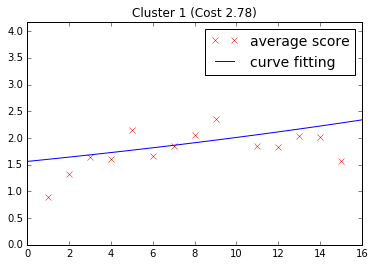

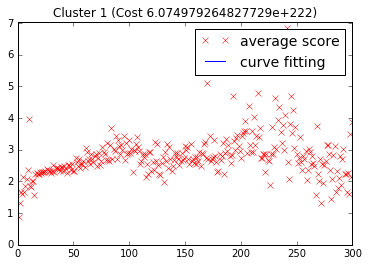

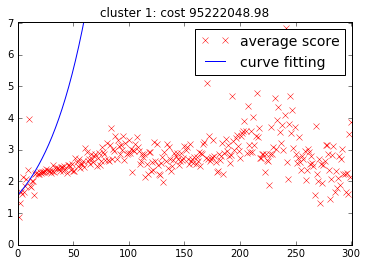

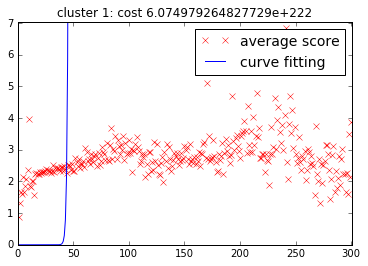

cluster 2:
 - Curve Fitting Parameters: [ 2.29732931 -0.01374208]
 - Curve Fitting Cost: 2.133531510619637

 - Curve Fitting Parameters: [  1.66865491e-19   1.00000000e+00]
 - Curve Fitting Cost: 6.074979264827729e+222



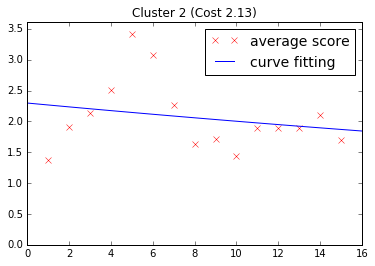

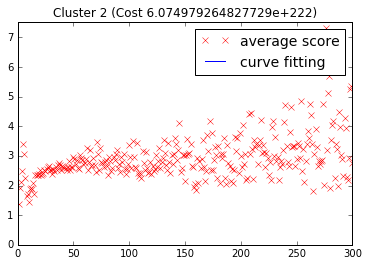

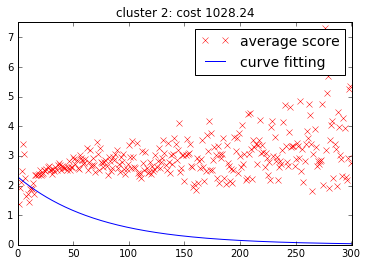

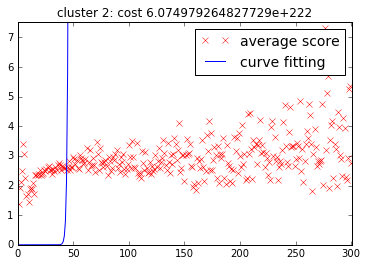

cluster 3:
 - Curve Fitting Parameters: [ 1.88765254  0.01151621]
 - Curve Fitting Cost: 1.1947590610041283

 - Curve Fitting Parameters: [  1.66865491e-19   1.00000000e+00]
 - Curve Fitting Cost: 6.074979264827729e+222



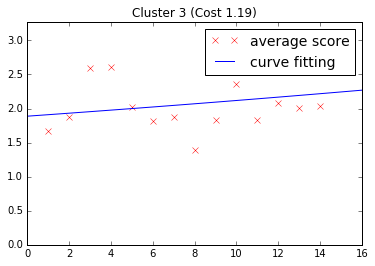

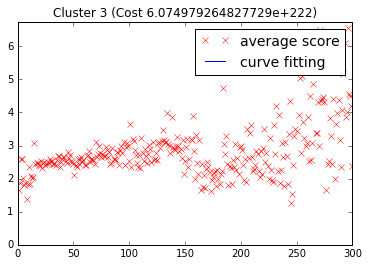

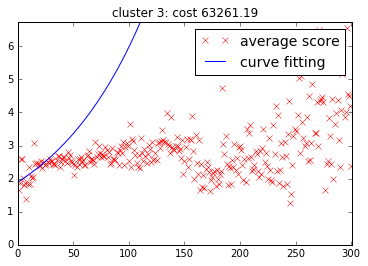

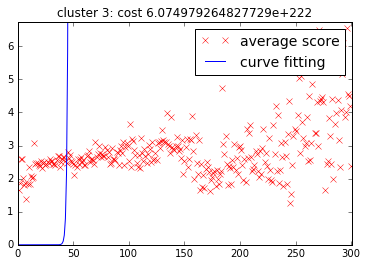

cluster 4:
 - Curve Fitting Parameters: [ 1.69568765  0.01299506]
 - Curve Fitting Cost: 3.3848209647675214

 - Curve Fitting Parameters: [  1.66865491e-19   1.00000000e+00]
 - Curve Fitting Cost: 6.074979264827729e+222



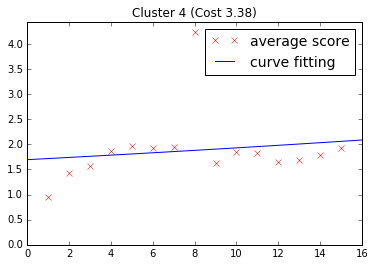

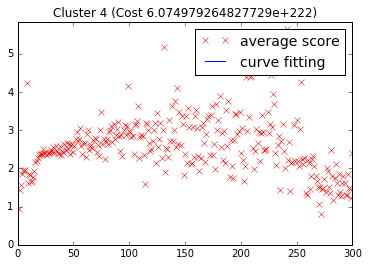

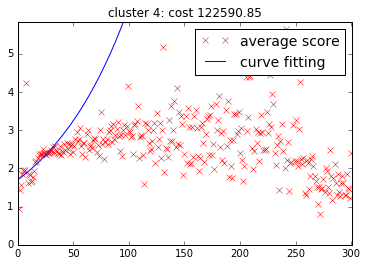

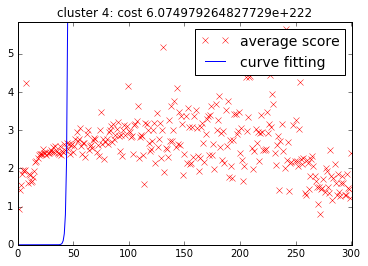

cluster 5:
 - Curve Fitting Parameters: [ 0.80803169  0.07611746]
 - Curve Fitting Cost: 1.456305827349976

 - Curve Fitting Parameters: [  1.66865491e-19   1.00000000e+00]
 - Curve Fitting Cost: 6.074979264827729e+222



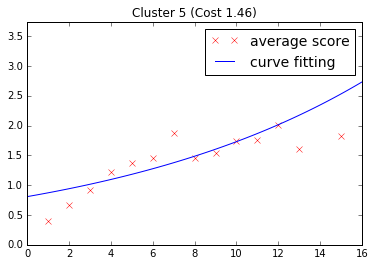

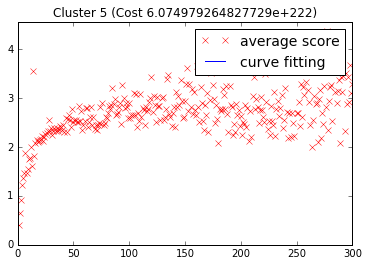

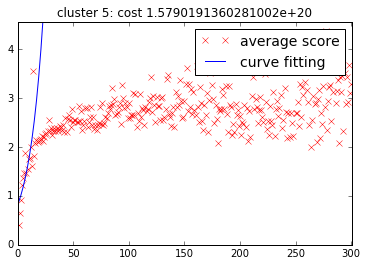

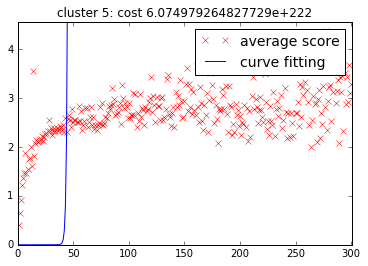

cluster 6:
 - Curve Fitting Parameters: [ 1.08722954  0.05414162]
 - Curve Fitting Cost: 2.2050806829627883

 - Curve Fitting Parameters: [  1.66865491e-19   1.00000000e+00]
 - Curve Fitting Cost: 6.074979264827729e+222



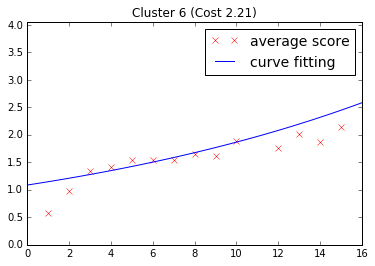

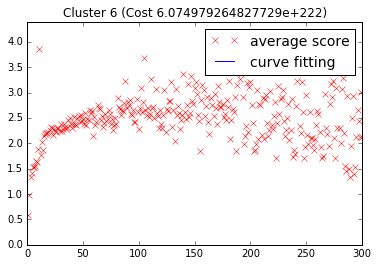

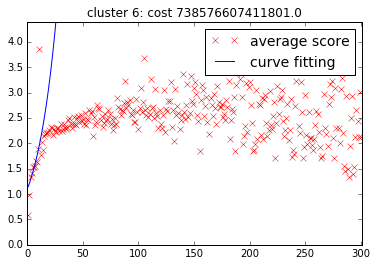

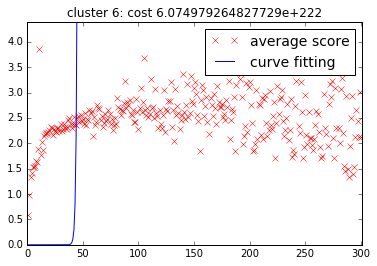

cluster 7:
 - Curve Fitting Parameters: [ 2.49215508 -0.01882037]
 - Curve Fitting Cost: 1.6114480710077457

 - Curve Fitting Parameters: [  1.66865491e-19   1.00000000e+00]
 - Curve Fitting Cost: 6.074979264827729e+222



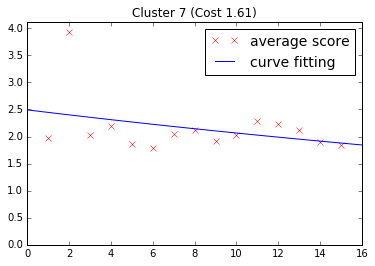

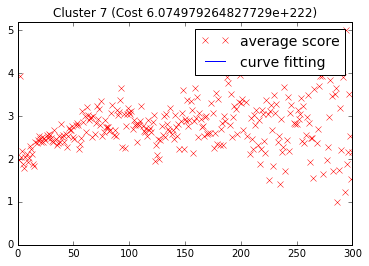

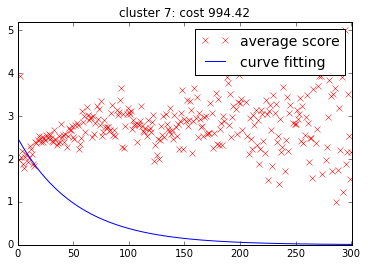

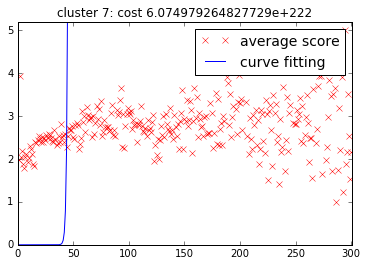

cluster 8:
 - Curve Fitting Parameters: [ 1.21662355  0.0453883 ]
 - Curve Fitting Cost: 2.345531341250885

 - Curve Fitting Parameters: [  1.66865491e-19   1.00000000e+00]
 - Curve Fitting Cost: 6.074979264827729e+222



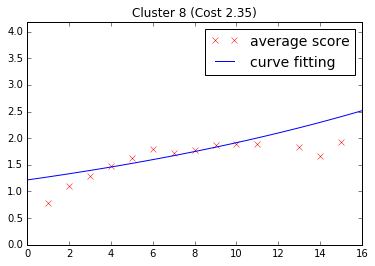

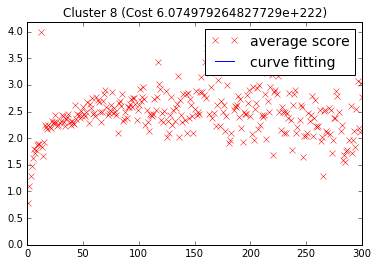

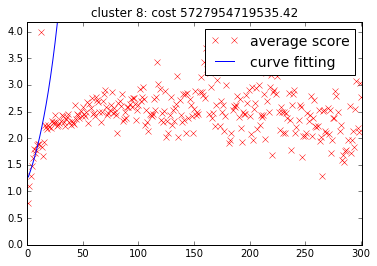

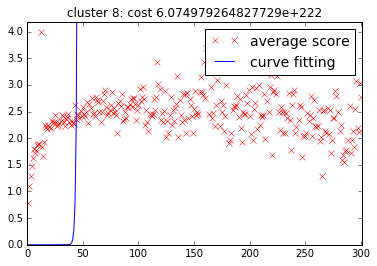

cluster 9:
 - Curve Fitting Parameters: [ 1.05039649  0.06018085]
 - Curve Fitting Cost: 2.0574558059040604

 - Curve Fitting Parameters: [  1.66865491e-19   1.00000000e+00]
 - Curve Fitting Cost: 6.074979264827729e+222



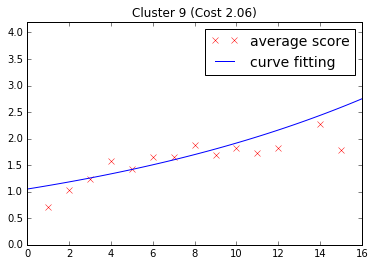

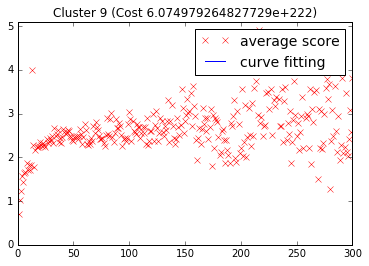

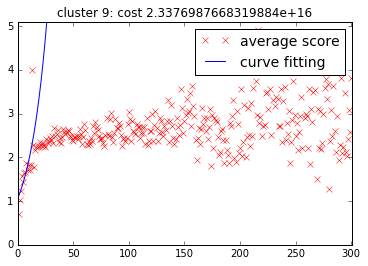

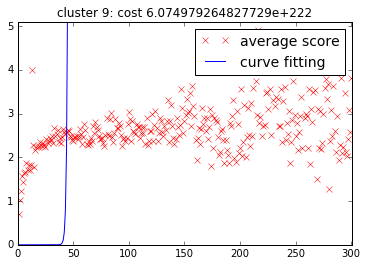

cluster 10:
 - Curve Fitting Parameters: [ 1.47234052  0.02431936]
 - Curve Fitting Cost: 1.9007757957405773

 - Curve Fitting Parameters: [  1.66865491e-19   1.00000000e+00]
 - Curve Fitting Cost: 6.074979264827729e+222



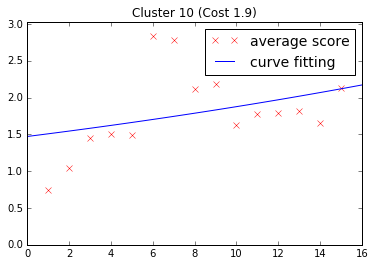

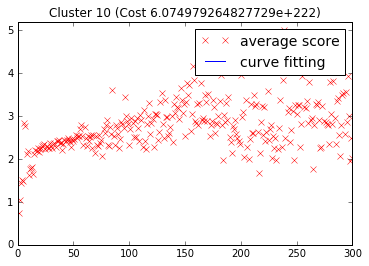

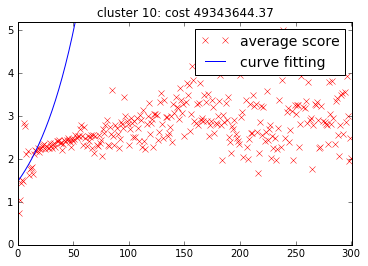

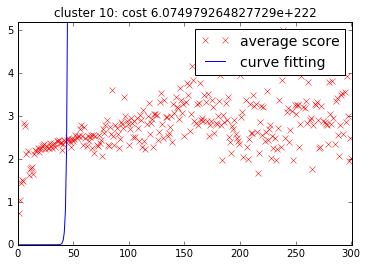

cluster 11:
 - Curve Fitting Parameters: [ 1.46976518  0.02853536]
 - Curve Fitting Cost: 3.4656079920517913

 - Curve Fitting Parameters: [  1.66865491e-19   1.00000000e+00]
 - Curve Fitting Cost: 6.074979264827729e+222



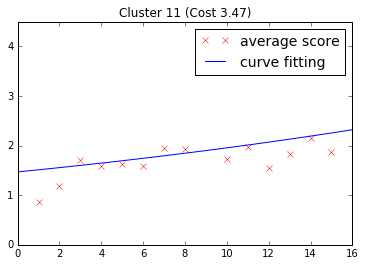

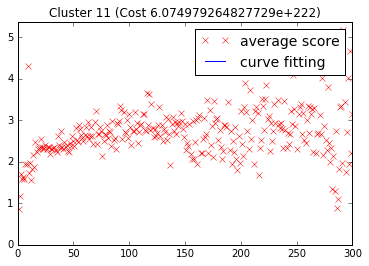

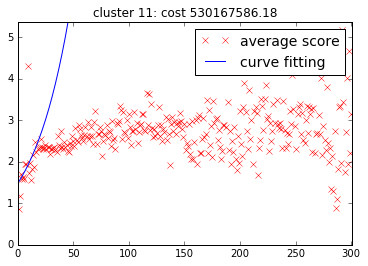

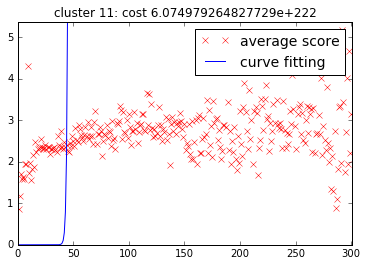

cluster 12:
 - Curve Fitting Parameters: [ 2.78910345 -0.03099679]
 - Curve Fitting Cost: 2.953859309387534

 - Curve Fitting Parameters: [  1.66865491e-19   1.00000000e+00]
 - Curve Fitting Cost: 6.074979264827729e+222



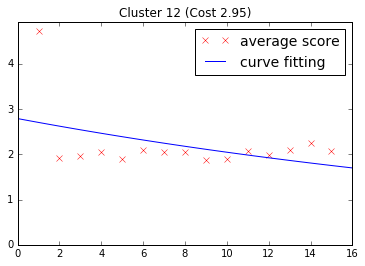

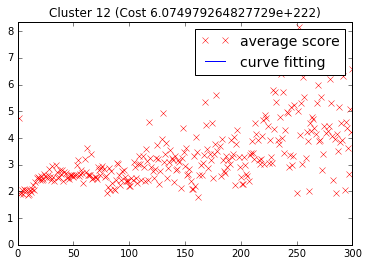

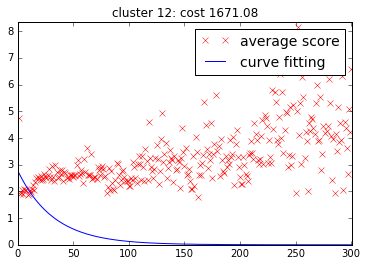

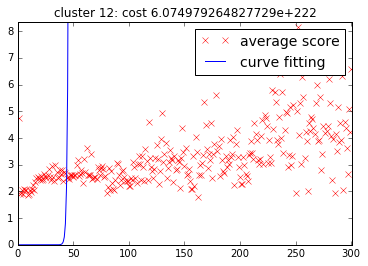

cluster 13:
 - Curve Fitting Parameters: [ 0.76832102  0.09078439]
 - Curve Fitting Cost: 1.6315485486738326

 - Curve Fitting Parameters: [  1.66865491e-19   1.00000000e+00]
 - Curve Fitting Cost: 6.074979264827729e+222



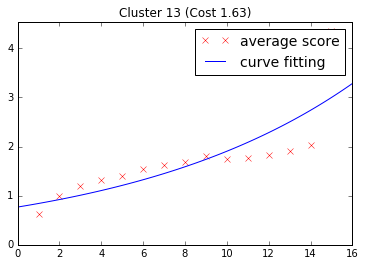

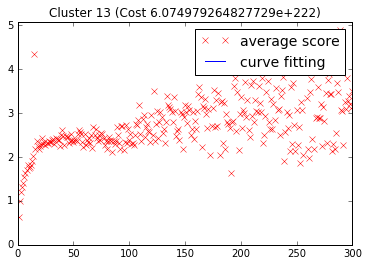

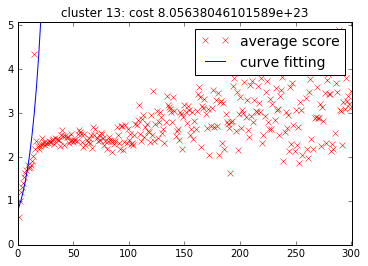

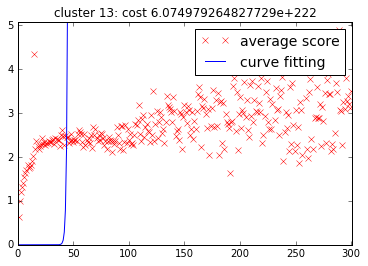

In [17]:
dcp.make_folders("../../Figs/curve_fitting/exponential2/single/")

seed = [1, 1]
for i in range(nClt):
    print("cluster {0}:".format(i+1))
    ## train
    exp2_opt, exp2_cost = cv.curve_Fitting(
        cv.exponential_least2, cv.exponential_curve2, 
        attempts15, eval("avg{0}".format(i+1))[:15], seed, 
        "../../Figs/curve_fitting/exponential2/single/sample{0}".format(i+1), clt_num = i+1)
    
    true_opt, true_cost = cv.curve_Fitting(
        cv.exponential_least2, cv.exponential_curve2, 
        attempts300, eval("avg{0}".format(i+1)), seed, 
        "../../Figs/curve_fitting/exponential2/single/dummy", clt_num = i+1)
    
    ## validation
    y_fit_valid = cv.exponential_curve2(attempts300, exp2_opt[0], exp2_opt[1])
    y_fit_true = cv.exponential_curve2(attempts300, true_opt[0], true_opt[1])
    
    exp2_cost_valid = cv.cost_Function(eval("avg{0}".format(i+1)), y_fit_valid) # get cost for all data
    exp2_cost_true = cv.cost_Function(eval("avg{0}".format(i+1)), y_fit_true) # get cost for all data
    
    disp_Data(attempts300, eval("avg{0}".format(i+1)), y_fit_valid, 
              file_path="../../Figs/curve_fitting/exponential2/single/valid{0}".format(i+1), 
              clt_num=i+1, cost = exp2_cost_valid)
    
    disp_Data(attempts300, eval("avg{0}".format(i+1)), y_fit_true, 
          file_path="../../Figs/curve_fitting/exponential2/single/true{0}".format(i+1), 
          clt_num=i+1, cost = exp2_cost_true)

## 1-2. Three parameters

cluster 1:
 - Curve Fitting Parameters: [-2.00160847  0.42611228  2.17056144]
 - Curve Fitting Cost: 2.146147017190004

 - Curve Fitting Parameters: [-1.28265857  0.02633991  2.94794977]
 - Curve Fitting Cost: 55.46435726096651



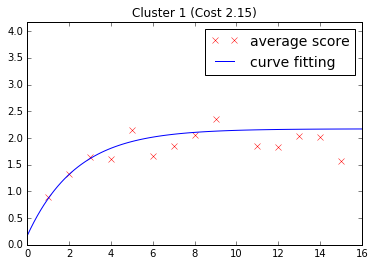

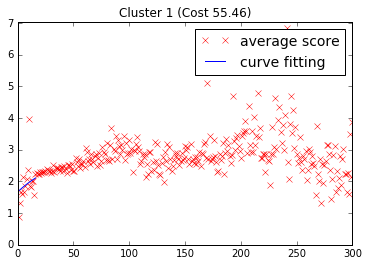

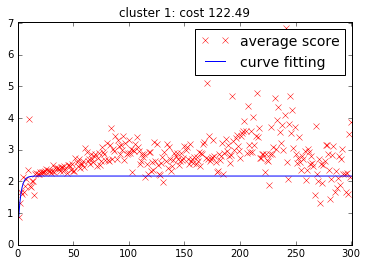

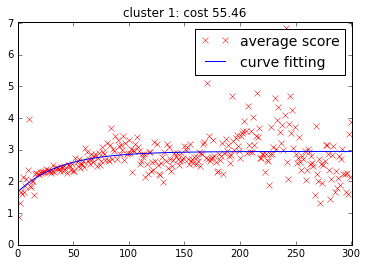

cluster 2:
 - Curve Fitting Parameters: [-4.22559632  1.71628217  2.12322736]
 - Curve Fitting Cost: 1.9851665938333365

 - Curve Fitting Parameters: [ -3.30648589e+02   1.12441419e-05   3.33016464e+02]
 - Curve Fitting Cost: 59.71182701018259



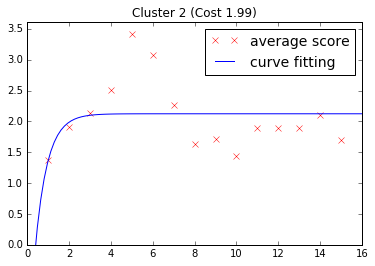

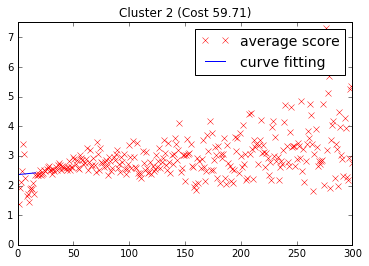

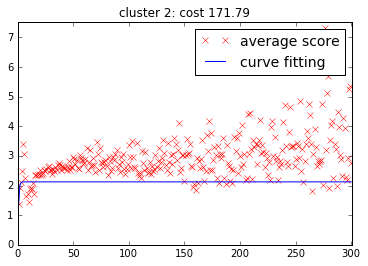

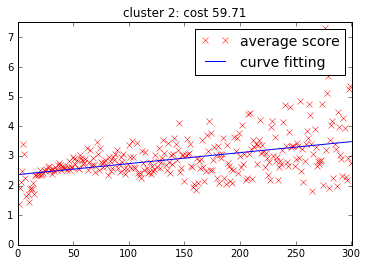

cluster 3:
 - Curve Fitting Parameters: [-3.28338585  1.98065419  2.10759774]
 - Curve Fitting Cost: 1.1736530081777292

 - Curve Fitting Parameters: [ -3.88267536e+03   1.09094508e-06   3.88487977e+03]
 - Curve Fitting Cost: 81.12849752496528



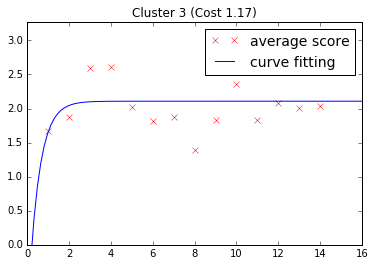

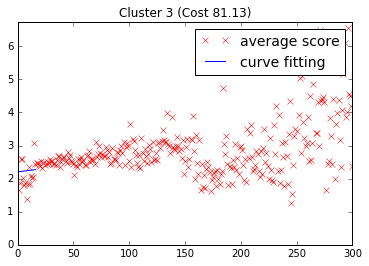

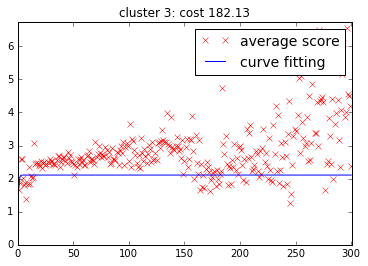

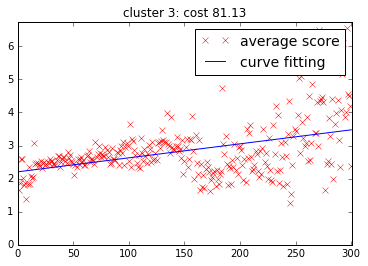

cluster 4:
 - Curve Fitting Parameters: [-2.19557588  0.65454941  2.04233369]
 - Curve Fitting Cost: 2.7777710493577996

 - Curve Fitting Parameters: [-1.23987859  0.06641421  2.65392166]
 - Curve Fitting Cost: 78.2007457096518



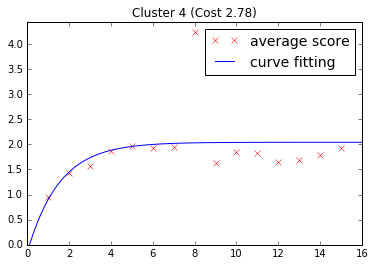

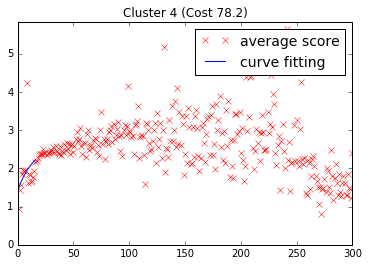

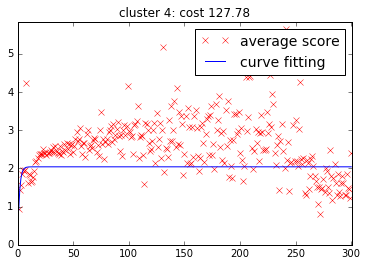

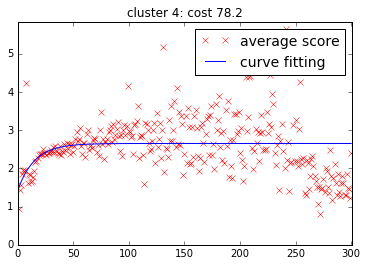

cluster 5:
 - Curve Fitting Parameters: [-2.79002862  0.08554788  3.06643318]
 - Curve Fitting Cost: 1.2908307689045408

 - Curve Fitting Parameters: [-1.81695634  0.040655    2.84914875]
 - Curve Fitting Cost: 20.792256387239696



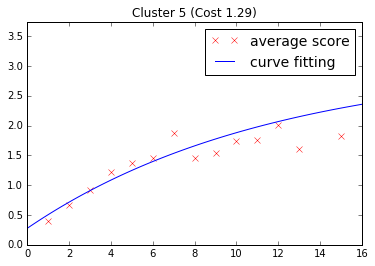

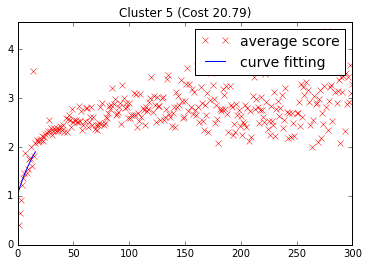

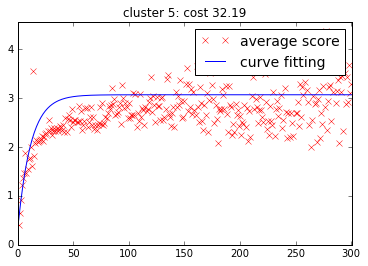

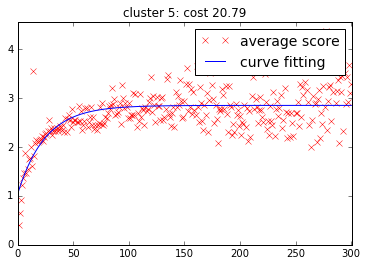

cluster 6:
 - Curve Fitting Parameters: [-2.04644951  0.17779547  2.36974918]
 - Curve Fitting Cost: 1.8650596726150284

 - Curve Fitting Parameters: [-1.72254196  0.08768534  2.56445288]
 - Curve Fitting Cost: 27.977867702017576



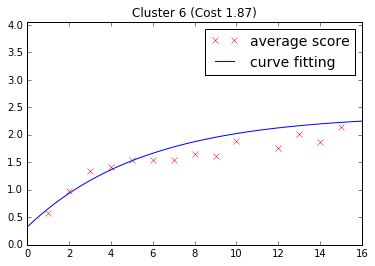

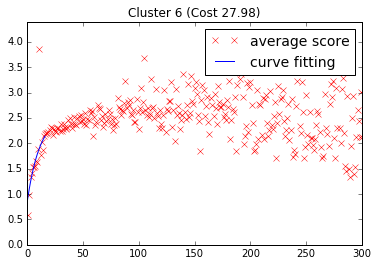

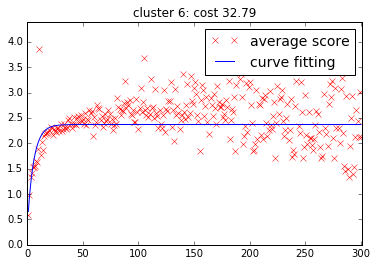

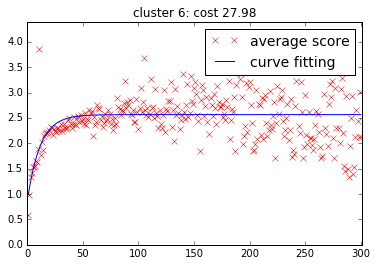

cluster 7:
 - Curve Fitting Parameters: [ 0.92966794  0.29287832  1.97130677]
 - Curve Fitting Cost: 1.5313734510915264

 - Curve Fitting Parameters: [-0.84596977  0.01980199  2.952567  ]
 - Curve Fitting Cost: 53.92132525678288



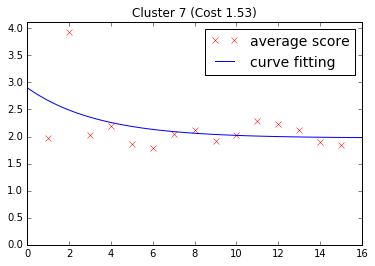

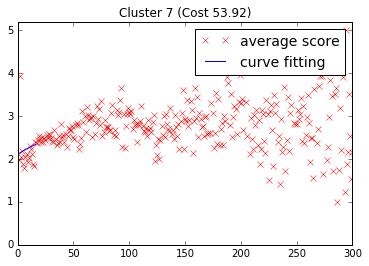

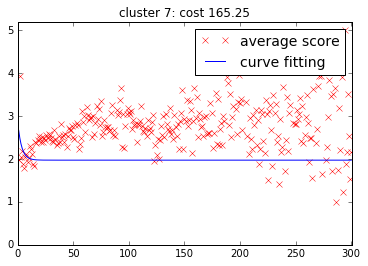

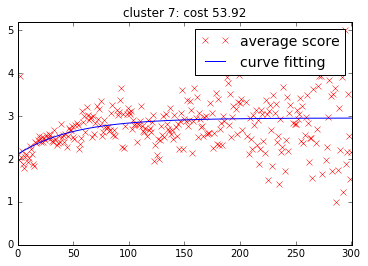

cluster 8:
 - Curve Fitting Parameters: [-1.84741446  0.20707396  2.29029035]
 - Curve Fitting Cost: 2.007345783561907

 - Curve Fitting Parameters: [-1.62282857  0.10251985  2.5148165 ]
 - Curve Fitting Cost: 21.73805796073817



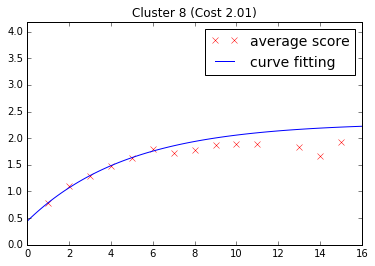

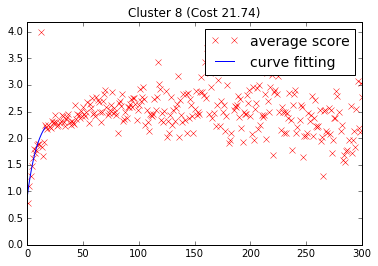

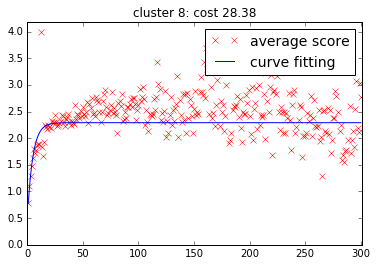

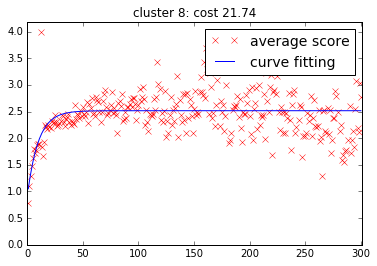

cluster 9:
 - Curve Fitting Parameters: [-2.59441764  0.07694343  3.23464585]
 - Curve Fitting Cost: 1.931748856863575

 - Curve Fitting Parameters: [-1.18408529  0.02344059  2.83302112]
 - Curve Fitting Cost: 38.48799173671209



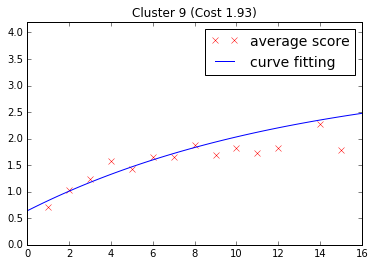

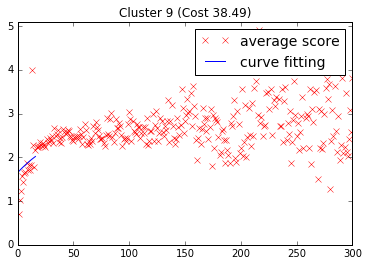

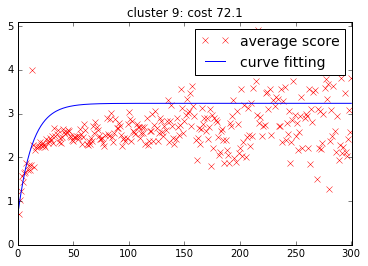

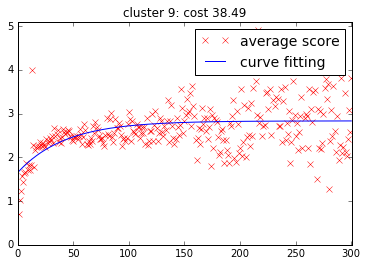

cluster 10:
 - Curve Fitting Parameters: [-2.42601538  0.54954881  2.01766317]
 - Curve Fitting Cost: 1.1043802091635895

 - Curve Fitting Parameters: [-1.3396725   0.01782061  3.01899419]
 - Curve Fitting Cost: 36.3159525751951



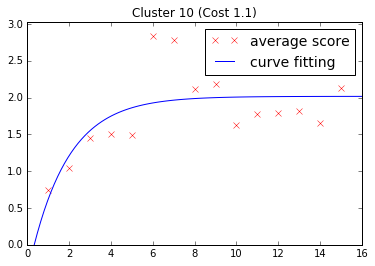

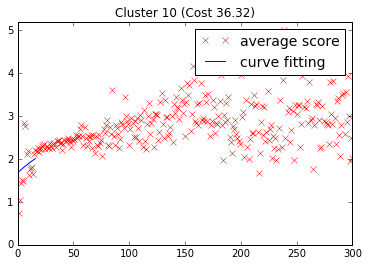

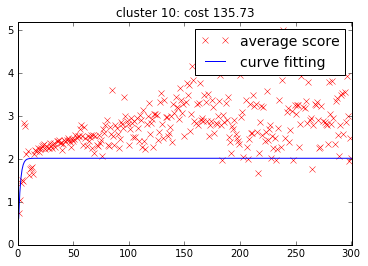

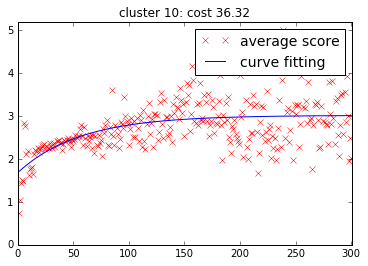

cluster 11:
 - Curve Fitting Parameters: [-1.92043006  0.39551302  2.12184071]
 - Curve Fitting Cost: 2.9076229560004436

 - Curve Fitting Parameters: [-1.25253379  0.03505553  2.81669082]
 - Curve Fitting Cost: 42.77317498006742



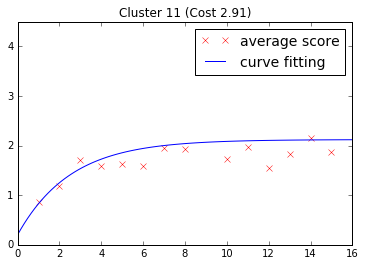

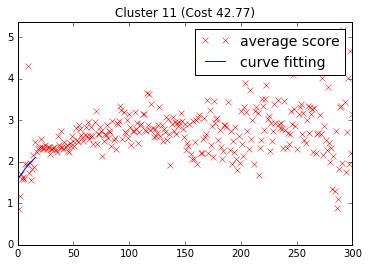

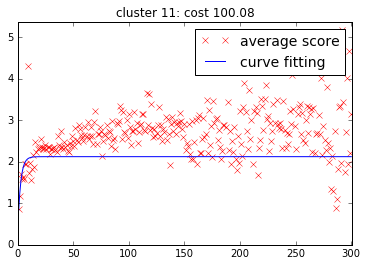

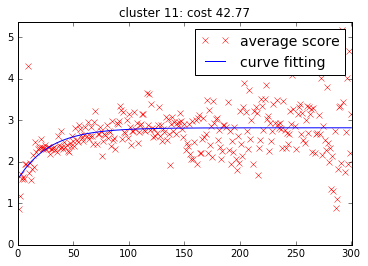

cluster 12:
 - Curve Fitting Parameters: [  1.12009730e+05   1.06282017e+01   2.01811415e+00]
 - Curve Fitting Cost: 0.06883833813406826

 - Curve Fitting Parameters: [  2.69128529e+04   9.84800140e+00   3.30567915e+00]
 - Curve Fitting Cost: 185.74979299566363



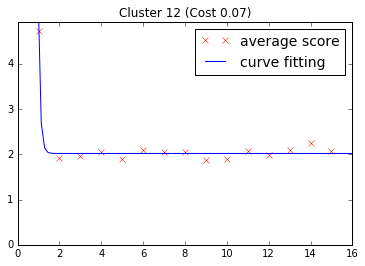

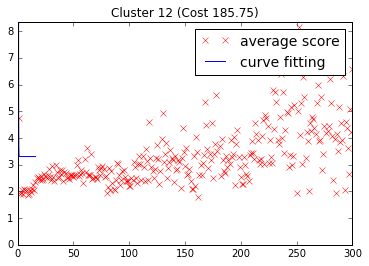

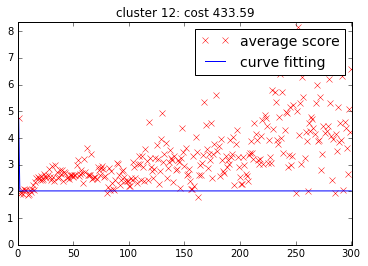

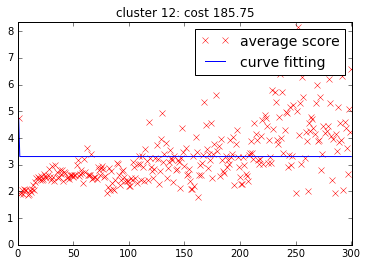

cluster 13:
 - Curve Fitting Parameters: [ -3.59329286e+03   3.92888729e-05   3.59388645e+03]
 - Curve Fitting Cost: 1.8806276567315305

 - Curve Fitting Parameters: [-1.36604342  0.00957426  3.17728797]
 - Curve Fitting Cost: 32.37950231900075



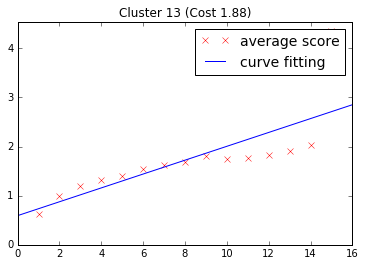

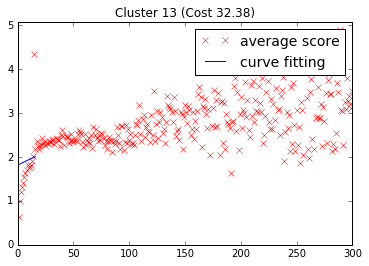

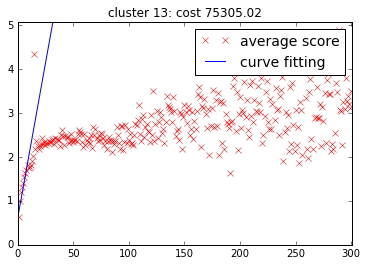

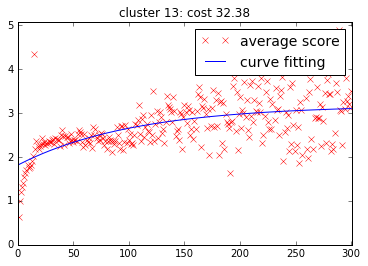

In [18]:
dcp.make_folders("../../Figs/curve_fitting/exponential3/single/")

seed = [1, 1, 1]
for i in range(nClt):
    print("cluster {0}:".format(i+1))
    exp3_opt, exp3_cost = cv.curve_Fitting(
        cv.exponential_least3, cv.exponential_curve3, 
        attempts15, eval("avg{0}".format(i+1))[:15], seed,
        "../../Figs/curve_fitting/exponential3/single/{0}".format(i+1), clt_num = i+1)
    
    true_opt, true_cost = cv.curve_Fitting(
        cv.exponential_least3, cv.exponential_curve3, 
        attempts300, eval("avg{0}".format(i+1)), seed,
        "../../Figs/curve_fitting/exponential3/single/dummy".format(i+1), clt_num = i+1)

    y_fit_valid = cv.exponential_curve3(attempts300, exp3_opt[0], exp3_opt[1], exp3_opt[2])
    y_fit_true = cv.exponential_curve3(attempts300, true_opt[0], true_opt[1], true_opt[2])
    
    exp3_cost_valid = cv.cost_Function(eval("avg{0}".format(i+1)), y_fit_valid) # get cost for all data
    exp3_cost_true = cv.cost_Function(eval("avg{0}".format(i+1)), y_fit_true) # get cost for all data
    
    cost_valid = cv.cost_Function(attempts300, y_fit_valid)
    cost_true = cv.cost_Function(attempts300, y_fit_true)
    
    disp_Data(attempts300, eval("avg{0}".format(i+1)), y_fit_valid,
              file_path="../../Figs/curve_fitting/exponential3/single/valid{0}".format(i+1), 
              clt_num=i+1, cost = exp3_cost_valid)
    disp_Data(attempts300, eval("avg{0}".format(i+1)), y_fit_true,
              file_path="../../Figs/curve_fitting/exponential3/single/true{0}".format(i+1), 
              clt_num=i+1, cost = exp3_cost_true)

## 1-2. Four parameters

cluster 1:
 - Curve Fitting Parameters: [-2.00160847  0.42611228  2.17056144]
 - Curve Fitting Cost: 2.146147017190004

 - Curve Fitting Parameters: [-1.28265857  0.02633991  2.94794977]
 - Curve Fitting Cost: 55.46435726096651



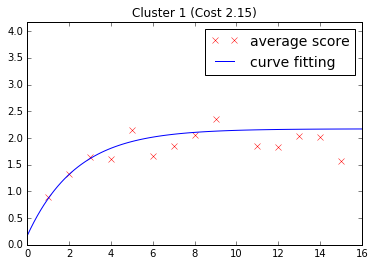

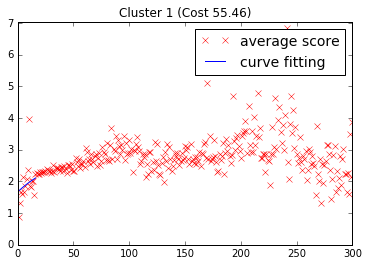

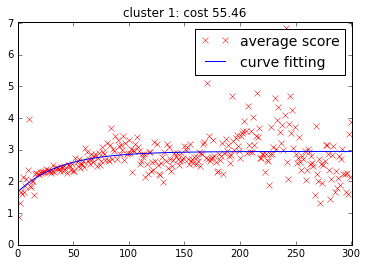

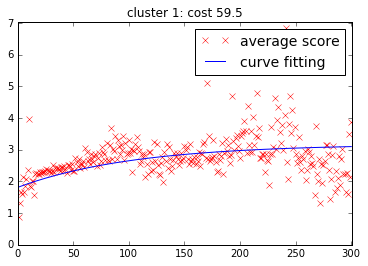

cluster 2:
 - Curve Fitting Parameters: [-4.22559632  1.71628217  2.12322736]
 - Curve Fitting Cost: 1.9851665938333365

 - Curve Fitting Parameters: [ -3.30648589e+02   1.12441419e-05   3.33016464e+02]
 - Curve Fitting Cost: 59.71182701018259



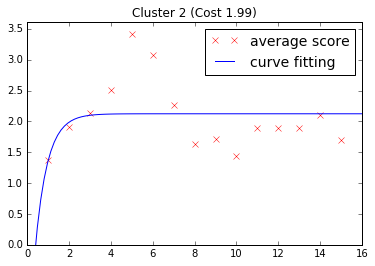

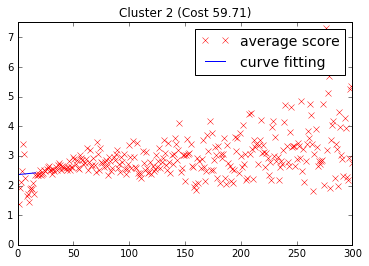

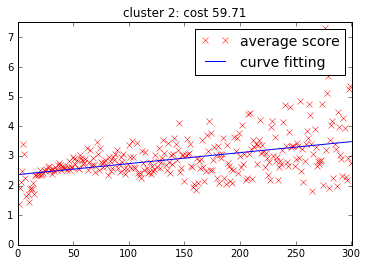

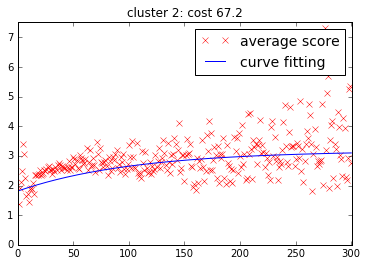

cluster 3:
 - Curve Fitting Parameters: [-3.28338585  1.98065419  2.10759774]
 - Curve Fitting Cost: 1.1736530081777292

 - Curve Fitting Parameters: [ -3.88267536e+03   1.09094508e-06   3.88487977e+03]
 - Curve Fitting Cost: 81.12849752496528



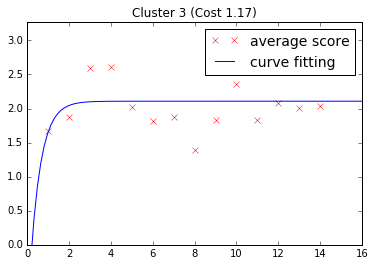

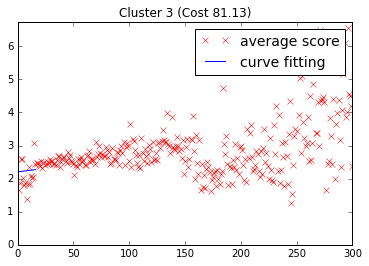

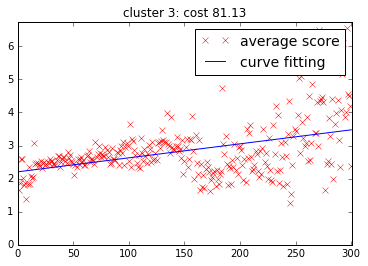

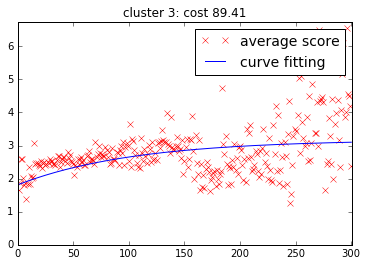

cluster 4:
 - Curve Fitting Parameters: [-2.19557588  0.65454941  2.04233369]
 - Curve Fitting Cost: 2.7777710493577996

 - Curve Fitting Parameters: [-1.23987859  0.06641421  2.65392166]
 - Curve Fitting Cost: 78.2007457096518



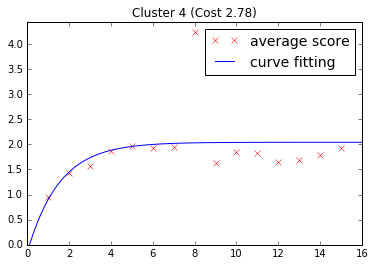

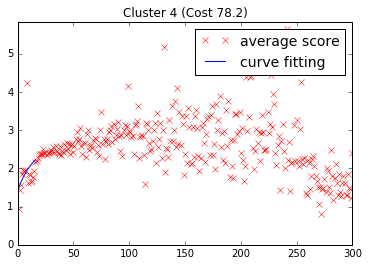

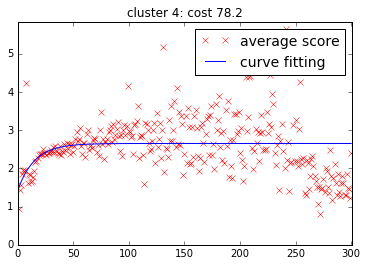

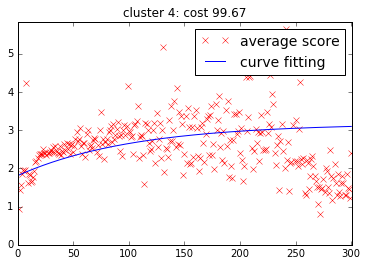

cluster 5:
 - Curve Fitting Parameters: [-2.79002862  0.08554788  3.06643318]
 - Curve Fitting Cost: 1.2908307689045408

 - Curve Fitting Parameters: [-1.81695634  0.040655    2.84914875]
 - Curve Fitting Cost: 20.792256387239696



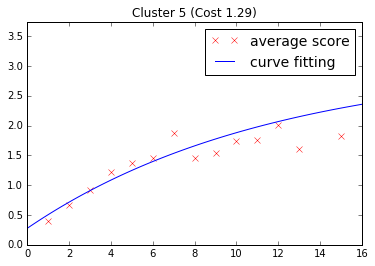

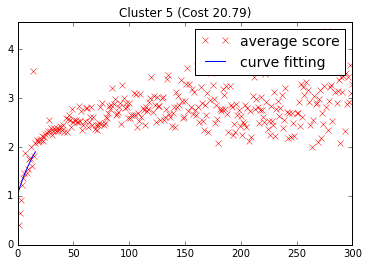

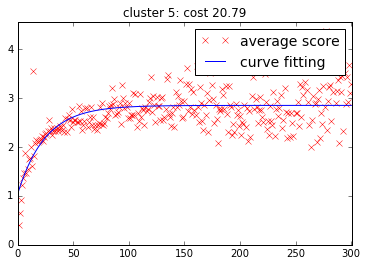

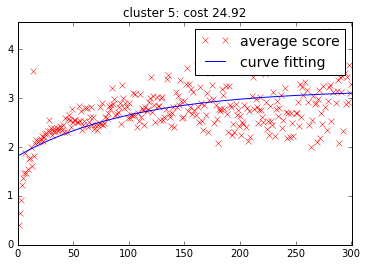

cluster 6:
 - Curve Fitting Parameters: [-2.04644951  0.17779547  2.36974918]
 - Curve Fitting Cost: 1.8650596726150284

 - Curve Fitting Parameters: [-1.72254196  0.08768534  2.56445288]
 - Curve Fitting Cost: 27.977867702017576



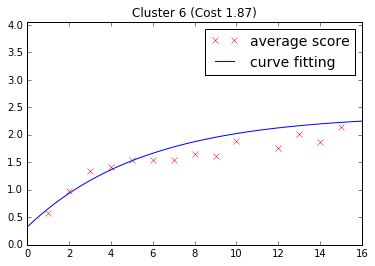

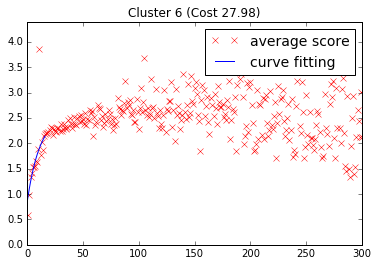

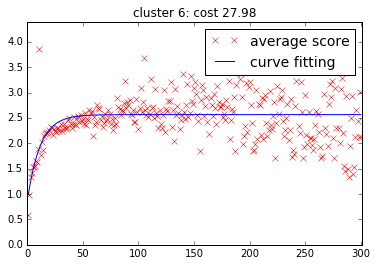

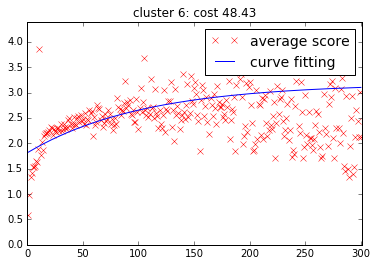

cluster 7:
 - Curve Fitting Parameters: [ 0.92966794  0.29287832  1.97130677]
 - Curve Fitting Cost: 1.5313734510915262

 - Curve Fitting Parameters: [-0.84596977  0.01980199  2.952567  ]
 - Curve Fitting Cost: 53.92132525678288



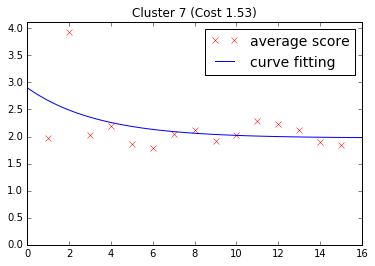

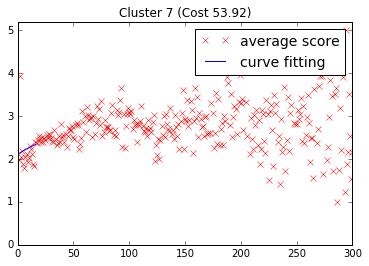

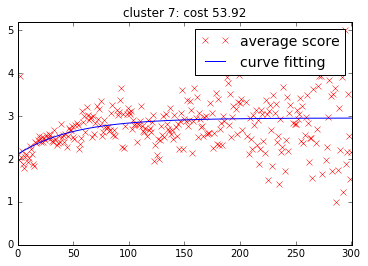

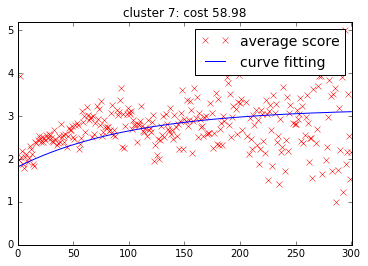

cluster 8:
 - Curve Fitting Parameters: [-1.84741446  0.20707396  2.29029035]
 - Curve Fitting Cost: 2.007345783561907

 - Curve Fitting Parameters: [-1.62282857  0.10251985  2.5148165 ]
 - Curve Fitting Cost: 21.73805796073817



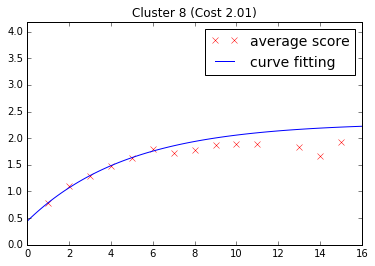

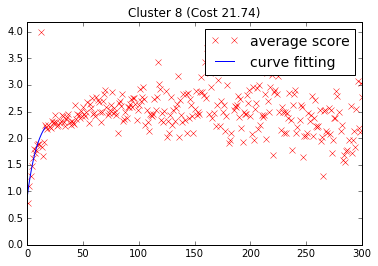

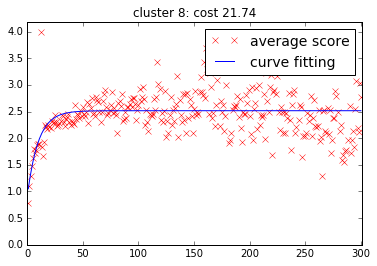

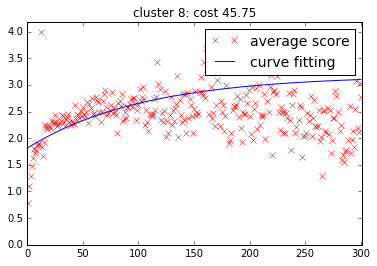

cluster 9:
 - Curve Fitting Parameters: [-2.59441764  0.07694343  3.23464585]
 - Curve Fitting Cost: 1.931748856863575

 - Curve Fitting Parameters: [-1.18408529  0.02344059  2.83302112]
 - Curve Fitting Cost: 38.48799173671209



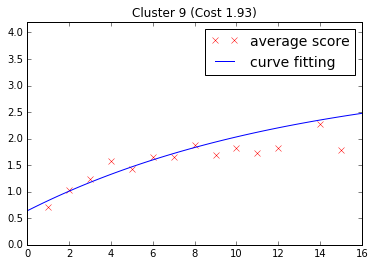

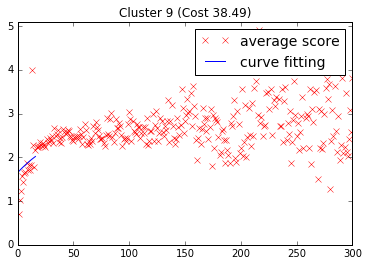

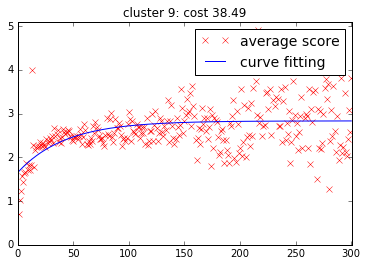

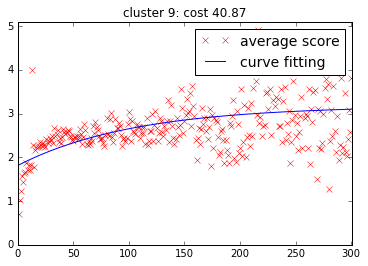

cluster 10:
 - Curve Fitting Parameters: [-2.42601538  0.54954881  2.01766317]
 - Curve Fitting Cost: 1.1043802091635895

 - Curve Fitting Parameters: [-1.3396725   0.01782061  3.01899419]
 - Curve Fitting Cost: 36.3159525751951



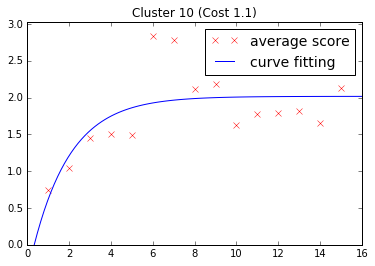

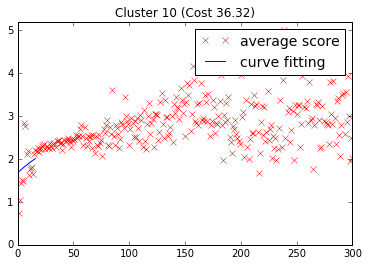

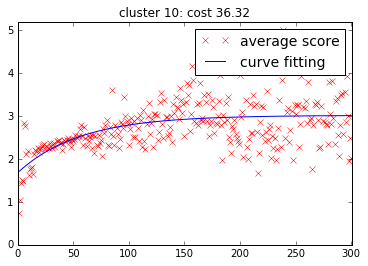

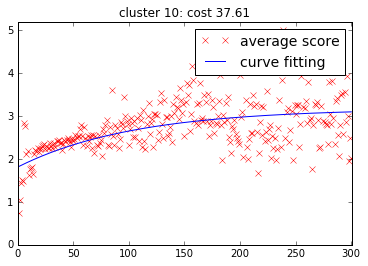

cluster 11:
 - Curve Fitting Parameters: [-1.92043006  0.39551302  2.12184071]
 - Curve Fitting Cost: 2.9076229560004436

 - Curve Fitting Parameters: [-1.25253379  0.03505553  2.81669082]
 - Curve Fitting Cost: 42.77317498006742



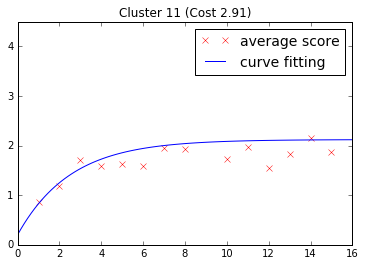

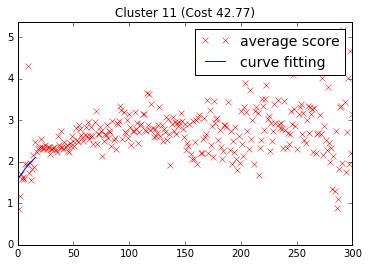

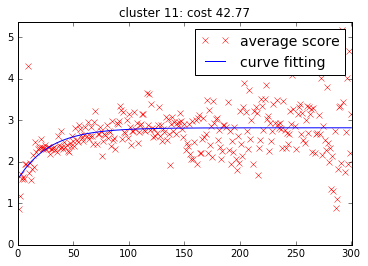

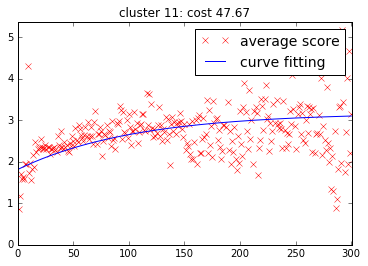

cluster 12:
 - Curve Fitting Parameters: [  1.12009730e+05   1.06282017e+01   2.01811415e+00]
 - Curve Fitting Cost: 0.06883833813406826

 - Curve Fitting Parameters: [  2.69128529e+04   9.84800140e+00   3.30567915e+00]
 - Curve Fitting Cost: 185.74979299566363



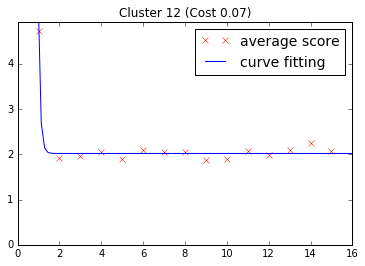

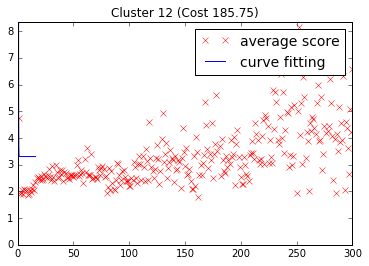

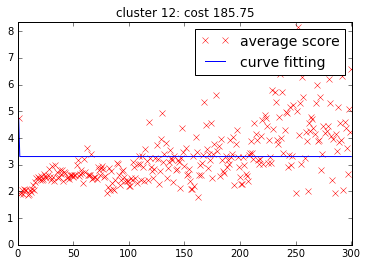

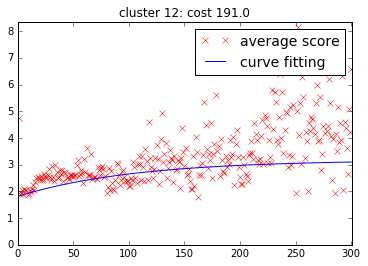

cluster 13:
 - Curve Fitting Parameters: [ -3.59329286e+03   3.92888729e-05   3.59388645e+03]
 - Curve Fitting Cost: 1.8806276567315305

 - Curve Fitting Parameters: [-1.36604342  0.00957426  3.17728797]
 - Curve Fitting Cost: 32.37950231900075



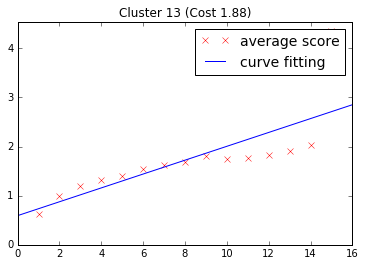

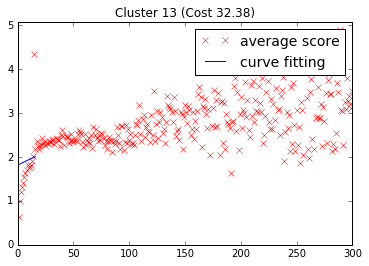

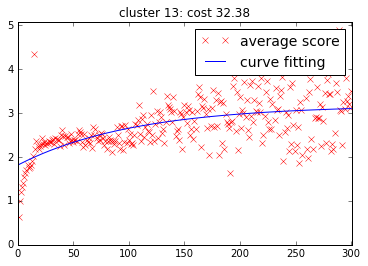

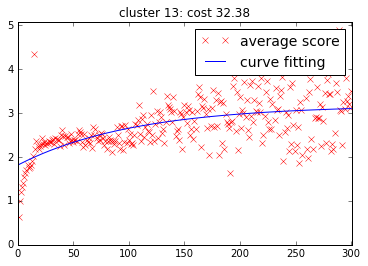

In [19]:
dcp.make_folders("../../Figs/curve_fitting/exponential4/single/")

seed = [1, 1, 1]
for i in range(nClt):
    print("cluster {0}:".format(i+1))
    exp3_opt, exp3_cost = cv.curve_Fitting(
        cv.exponential_least3, cv.exponential_curve3,
        attempts15, eval("avg{0}".format(i+1))[:15], seed,
        "../../Figs/curve_fitting/exponential3/single/sample{0}".format(i+1), clt_num = i+1)

    true_opt, true_cost = cv.curve_Fitting(
        cv.exponential_least3, cv.exponential_curve3, 
        attempts300, eval("avg{0}".format(i+1)), seed,
        "../../Figs/curve_fitting/exponential3/single/dummy", clt_num = i+1)

    y_fit_valid = cv.exponential_curve3(attempts300, exp3_opt[0], exp3_opt[1], exp3_opt[2])
    y_fit_valid = cv.exponential_curve3(attempts300, true_opt[0], true_opt[1], true_opt[2])
    
    exp3_cost_valid = cv.cost_Function(eval("avg{0}".format(i+1)), y_fit_valid) # get cost for all data
    exp3_cost_true = cv.cost_Function(eval("avg{0}".format(i+1)), y_fit_true) # get cost for all data
    
    cost_valid = cv.cost_Function(attempts300, y_fit_valid)
    cost_true = cv.cost_Function(attempts300, y_fit_true)
    
    disp_Data(attempts300, eval("avg{0}".format(i+1)), y_fit_valid,
              file_path="../../Figs/curve_fitting/exponential4/single/valid{0}".format(i+1), 
              clt_num=i+1, cost = exp3_cost_valid)
    disp_Data(attempts300, eval("avg{0}".format(i+1)), y_fit_true,
              file_path="../../Figs/curve_fitting/exponential4/single/true{0}".format(i+1), 
              clt_num=i+1, cost = exp3_cost_true)

# 2. Multiple Curves
## 2-1. Two parameters
#### 1) two curves

In [ ]:
dcp.make_folders("../../Figs/curve_fitting/exponential2/two/")

seed = [1, 1]

for i in range(nClt): 
    print("cluster {0}:".format(i+1))
    exp2_p1 = cv.multi_curveFitting_2(cv.exponential_least2, eval("avg{0}".format(i+1)), seed, min_range=15)

    x_range = np.linspace(1, 300, 300)
    x1 = x_range[:exp2_p1]
    x2 = x_range[exp2_p1:]

    true_y1 = eval("avg{0}".format(i+1))[:exp2_p1]
    true_y2 = eval("avg{0}".format(i+1))[exp2_p1:]

    lsq1 = least_squares(cv.exponential_least2, seed, args=(x1, true_y1))
    lsq2 = least_squares(cv.exponential_least2, seed, args=(x2, true_y2))

    pred_y1 = cv.exponential_curve2(x_range[:exp2_p1], lsq1.x[0], lsq1.x[1])
    pred_y2 = cv.exponential_curve2(x_range, lsq2.x[0], lsq2.x[1])

    print(" - break point: {0}".format(exp2_p1))
    ## save figures
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))

    ax.plot(attempts300, eval("avg{0}".format(i+1)), 'rx', label='average score')
    ax.plot(x_range[:exp2_p1], pred_y1, 'b-', label='curve 1', linewidth=3)
    ax.plot(x_range, pred_y2, 'g-', label='curve 2', linewidth=3)
    ax.plot(np.ones(100)*exp2_p1, np.linspace(0, 10, 100), '-.k', linewidth=1)
    ax.set_title("Cluster {0} (Cost {1}), Break point{2}"
                 .format(i, round(lsq1.cost+lsq2.cost, 2), exp2_p1) )
    ax.set_ylim([0, max( eval("avg{0}".format(i+1)) )+0.2])
    ax.legend(fontsize=14)
    fig.savefig("../../Figs/curve_fitting/exponential2/two/cluster{0}".format(i+1), dpi=100)
    # plt.show()

#### 2) three curves

In [ ]:
dcp.make_folders("../../Figs/curve_fitting/exponential2/three/")

seed = [1, 1, 1]

for i in range(nClt): 
    print("cluster {0}:".format(i+1))
    exp2_p1, exp2_p2 = cv.multi_curveFitting_3(cv.exponential_least2, eval("avg{0}".format(i+1)), seed, min_range=15)

    x_range = np.linspace(1, 300, 300)
    x1 = x_range[:exp2_p1]
    x2 = x_range[exp2_p1:exp2_p2]
    x3 = x_range[exp2_p2:]

    true_y1 = eval("avg{0}".format(i+1))[:exp2_p1]
    true_y2 = eval("avg{0}".format(i+1))[exp2_p1:exp2_p2]
    true_y3 = eval("avg{0}".format(i+1))[exp2_p2:]

    lsq1 = least_squares(cv.exponential_least2, seed, args=(x1, true_y1))
    lsq2 = least_squares(cv.exponential_least2, seed, args=(x2, true_y2))
    lsq3 = least_squares(cv.exponential_least2, seed, args=(x3, true_y3))

    pred_y1 = cv.exponential_curve2(x_range[:exp2_p1], lsq1.x[0], lsq1.x[1])
    pred_y2 = cv.exponential_curve2(x_range[:exp2_p2], lsq2.x[0], lsq2.x[1])
    pred_y3 = cv.exponential_curve2(x_range, lsq3.x[0], lsq3.x[1])

    print(" - break point: {0} and {1}".format(exp2_p1, exp2_p2))
    ## save figures
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))

    ax.plot(attempts300, eval("avg{0}".format(i+1)), 'rx', label='average score')
    ax.plot(x_range[:exp2_p1], pred_y1, 'b-', label='curve 1', linewidth=3)
    ax.plot(x_range[:exp2_p2], pred_y2, 'g-', label='curve 2', linewidth=3)
    ax.plot(x_range, pred_y3, 'c-', label='curve 2', linewidth=3)
    
    # break points
    ax.plot(np.ones(100)*exp2_p1, np.linspace(0, 10, 100), '-.k', linewidth=1)
    ax.plot(np.ones(100)*exp2_p2, np.linspace(0, 10, 100), '-.k', linewidth=1)
    
    ax.set_title("Cluster {0} (Cost {1}), Break point:{2} and {3}"
                 .format(i, round(lsq1.cost+lsq2.cost+lsq3.cost, 2), exp2_p1, exp2_p2) )
    ax.set_ylim([0, max( eval("avg{0}".format(i+1)) )+0.2])
    ax.legend(fontsize=14)
    fig.savefig("../../Figs/curve_fitting/exponential2/three/cluster{0}".format(i+1), dpi=100)
    # plt.show()

## 2-2. Three parameters
#### 1) two curves

In [ ]:
dcp.make_folders("../../Figs/curve_fitting/exponential3/two/")

seed = [1, 1, 1]

for i in range(nClt): 
    print("cluster {0}:".format(i+1))
    exp3_p1 = cv.multi_curveFitting_2(cv.exponential_least3, eval("avg{0}".format(i+1)), seed, min_range=15)

    x_range = np.linspace(1, 300, 300)
    x1 = x_range[:exp3_p1]
    x2 = x_range[exp3_p1:]

    true_y1 = eval("avg{0}".format(i+1))[:exp3_p1]
    true_y2 = eval("avg{0}".format(i+1))[exp3_p1:]

    lsq1 = least_squares(cv.exponential_least3, seed, args=(x1, true_y1))
    lsq2 = least_squares(cv.exponential_least3, seed, args=(x2, true_y2))

    pred_y1 = cv.exponential_curve3(x_range[:exp3_p1], lsq1.x[0], lsq1.x[1], lsq1.x[2])
    pred_y2 = cv.exponential_curve3(x_range, lsq2.x[0], lsq2.x[1], lsq2.x[2])

    print(" - break point: {0}".format(exp3_p1))
    ## save figures
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))

    ax.plot(attempts300, eval("avg{0}".format(i+1)), 'rx', label='average score')
    ax.plot(x_range[:exp3_p1], pred_y1, 'b-', label='curve 1', linewidth=3)
    ax.plot(x_range, pred_y2, 'g-', label='curve 2', linewidth=3)
    ax.plot(np.ones(100)*exp3_p1, np.linspace(0, 10, 100), '-.k', linewidth=1)
    ax.set_title("Cluster {0} (Cost {1}), Break point{2}"
                 .format(i, round(lsq1.cost+lsq2.cost, 2), exp3_p1) )
    ax.set_ylim([0, max( eval("avg{0}".format(i+1)) )+0.2])
    ax.legend(fontsize=14)
    fig.savefig("../../Figs/curve_fitting/exponential3/two/cluster{0}".format(i+1), dpi=100)
    # plt.show()

#### 2) three curves

In [ ]:
dcp.make_folders("../../Figs/curve_fitting/exponential3/three/")

seed = [1, 1, 1]

for i in range(nClt): 
    print("cluster {0}:".format(i+1))
    exp3_p1, exp3_p2 = cv.multi_curveFitting_3(cv.exponential_least3, eval("avg{0}".format(i+1)), seed, min_range=15)

    x_range = np.linspace(1, 300, 300)
    x1 = x_range[:exp3_p1]
    x2 = x_range[exp3_p1:exp3_p2]
    x3 = x_range[exp3_p2:]

    true_y1 = eval("avg{0}".format(i+1))[:exp3_p1]
    true_y2 = eval("avg{0}".format(i+1))[exp3_p1:exp3_p2]
    true_y3 = eval("avg{0}".format(i+1))[exp3_p2:]

    lsq1 = least_squares(cv.exponential_least3, seed, args=(x1, true_y1))
    lsq2 = least_squares(cv.exponential_least3, seed, args=(x2, true_y2))
    lsq3 = least_squares(cv.exponential_least3, seed, args=(x3, true_y3))

    pred_y1 = cv.exponential_curve3(x_range[:exp3_p1], lsq1.x[0], lsq1.x[1], lsq1.x[2])
    pred_y2 = cv.exponential_curve3(x_range[:exp3_p2], lsq2.x[0], lsq2.x[1], lsq2.x[2])
    pred_y3 = cv.exponential_curve3(x_range, lsq3.x[0], lsq3.x[1], lsq3.x[2])

    print(" - break point: {0} and {1}".format(exp3_p1, exp3_p2))
    ## save figures
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))

    ax.plot(attempts300, eval("avg{0}".format(i+1)), 'rx', label='average score')
    ax.plot(x_range[:exp3_p1], pred_y1, 'b-', label='curve 1', linewidth=3)
    ax.plot(x_range[:exp3_p2], pred_y2, 'g-', label='curve 2', linewidth=3)
    ax.plot(x_range, pred_y3, 'c-', label='curve 2', linewidth=3)
    
    # break points
    ax.plot(np.ones(100)*exp3_p1, np.linspace(0, 10, 100), '-.k', linewidth=1)
    ax.plot(np.ones(100)*exp3_p2, np.linspace(0, 10, 100), '-.k', linewidth=1)
    
    ax.set_title("Cluster {0} (Cost {1}), Break point:{2} and {3}"
                 .format(i, round(lsq1.cost+lsq2.cost+lsq3.cost, 2), exp3_p1, exp3_p2) )
    ax.set_ylim([0, max( eval("avg{0}".format(i+1)) )+0.2])
    ax.legend(fontsize=14)
    fig.savefig("../../Figs/curve_fitting/exponential3/three/cluster{0}".format(i+1), dpi=100)
    # plt.show()

## 2-2. Four parameters
#### 1) two curves

In [ ]:
dcp.make_folders("../../Figs/curve_fitting/exponential4/two/")

seed = [1, 1, 1, 1]

for i in range(nClt): 
    print("cluster {0}:".format(i+1))
    p1 = cv.multi_curveFitting_2(cv.exponential_least4, eval("avg{0}".format(i+1)), seed, min_range=50)

    x_range = np.linspace(1, 300, 300)
    x1 = x_range[:p1]
    x2 = x_range[p1:]

    true_y1 = eval("avg{0}".format(i+1))[:p1]
    true_y2 = eval("avg{0}".format(i+1))[p1:]

    lsq1 = least_squares(cv.exponential_least4, seed, args=(x1, true_y1))
    lsq2 = least_squares(cv.exponential_least4, seed, args=(x2, true_y2))

    pred_y1 = cv.exponential_curve4(x_range[:p1], lsq1.x[0], lsq1.x[1], lsq1.x[2], lsq1.x[3])
    pred_y2 = cv.exponential_curve4(x_range, lsq2.x[0], lsq2.x[1], lsq2.x[2], lsq2.x[3])

    print(" - break point: {0}".format(p1))
    ## save figures
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))

    ax.plot(attempts300, eval("avg{0}".format(i+1)), 'rx', label='average score')
    ax.plot(x_range[:p1], pred_y1, 'b-', label='curve 1', linewidth=3)
    ax.plot(x_range, pred_y2, 'g-', label='curve 2', linewidth=3)
    ax.plot(np.ones(100)*p1, np.linspace(0, 10, 100), '-.k', linewidth=1)
    ax.set_title("Cluster {0} (Cost {1}), Break point{2}"
                 .format(i, round(lsq1.cost+lsq2.cost, 2), p1) )
    ax.set_ylim([0, max( eval("avg{0}".format(i+1)) )+0.2])
    ax.legend(fontsize=14)
    fig.savefig("../../Figs/curve_fitting/exponential4/two/cluster{0}".format(i+1), dpi=100)
    # plt.show()

#### 2) three curves

In [ ]:
dcp.make_folders("../../Figs/curve_fitting/exponential4/three/")

seed = [1, 1, 1, 1]

for i in range(nClt): 
    print("cluster {0}:".format(i+1))
    p1, p2 = cv.multi_curveFitting_3(cv.exponential_least4, eval("avg{0}".format(i+1)), seed, min_range=50)

    x_range = np.linspace(1, 300, 300)
    x1 = x_range[:p1]
    x2 = x_range[p1:p2]
    x3 = x_range[p2:]

    true_y1 = eval("avg{0}".format(i+1))[:p1]
    true_y2 = eval("avg{0}".format(i+1))[p1:p2]
    true_y3 = eval("avg{0}".format(i+1))[p2:]

    lsq1 = least_squares(cv.exponential_least4, seed, args=(x1, true_y1))
    lsq2 = least_squares(cv.exponential_least4, seed, args=(x2, true_y2))
    lsq3 = least_squares(cv.exponential_least4, seed, args=(x3, true_y3))

    pred_y1 = cv.exponential_curve4(x_range[:p1], lsq1.x[0], lsq1.x[1], lsq1.x[2], lsq1.x[3])
    pred_y2 = cv.exponential_curve4(x_range[:p2], lsq2.x[0], lsq2.x[1], lsq2.x[2], lsq2.x[3])
    pred_y3 = cv.exponential_curve4(x_range, lsq3.x[0], lsq3.x[1], lsq3.x[2], lsq3.x[3])

    print(" - break point: {0}".format(p1))
    ## save figures
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))

    ax.plot(attempts300, eval("avg{0}".format(i+1)), 'rx', label='average score')
    ax.plot(x_range[:p1], pred_y1, 'b-', label='curve 1', linewidth=3)
    ax.plot(x_range[:p2], pred_y2, 'g-', label='curve 2', linewidth=3)
    ax.plot(x_range, pred_y3, 'c-', label='curve 2', linewidth=3)
    
    # break points
    ax.plot(np.ones(100)*p1, np.linspace(0, 10, 100), '-.k', linewidth=1)
    ax.plot(np.ones(100)*p2, np.linspace(0, 10, 100), '-.k', linewidth=1)
    
    ax.set_title("Cluster {0} (Cost {1}), Break point{2}"
                 .format(i, round(lsq1.cost+lsq2.cost, 2), p1) )
    ax.set_ylim([0, max( eval("avg{0}".format(i+1)) )+0.2])
    ax.legend(fontsize=14)
    fig.savefig("../../Figs/curve_fitting/exponential4/three/cluster{0}".format(i+1), dpi=100)
    # plt.show()